In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_dataset = pd.read_csv('ratings.csv')
netflix_dataset.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
netflix_dataset.tail()

,userId,movieId,rating,timestamp
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376
1048574,7120,266,3.5,1175542454


In [4]:
netflix_dataset.drop(columns= ['timestamp'], inplace=True)
netflix_dataset.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [5]:
total_movies = netflix_dataset.movieId.nunique()
total_movies

14026

In [6]:
netflix_dataset.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [7]:
netflix_dataset.shape

(1048575, 3)

In [8]:
netflix_dataset.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [9]:
customer_count = netflix_dataset['userId'].nunique()
customer_count

7120

In [10]:
netflix_dataset.rating.unique()

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

In [11]:
stars=netflix_dataset.groupby('rating')['rating'].agg(['count'])
stars

,count
rating,
0.5,13232
1.0,35144
1.5,14029
2.0,74706
2.5,44791
3.0,226202
3.5,112926
4.0,295135
4.5,79848


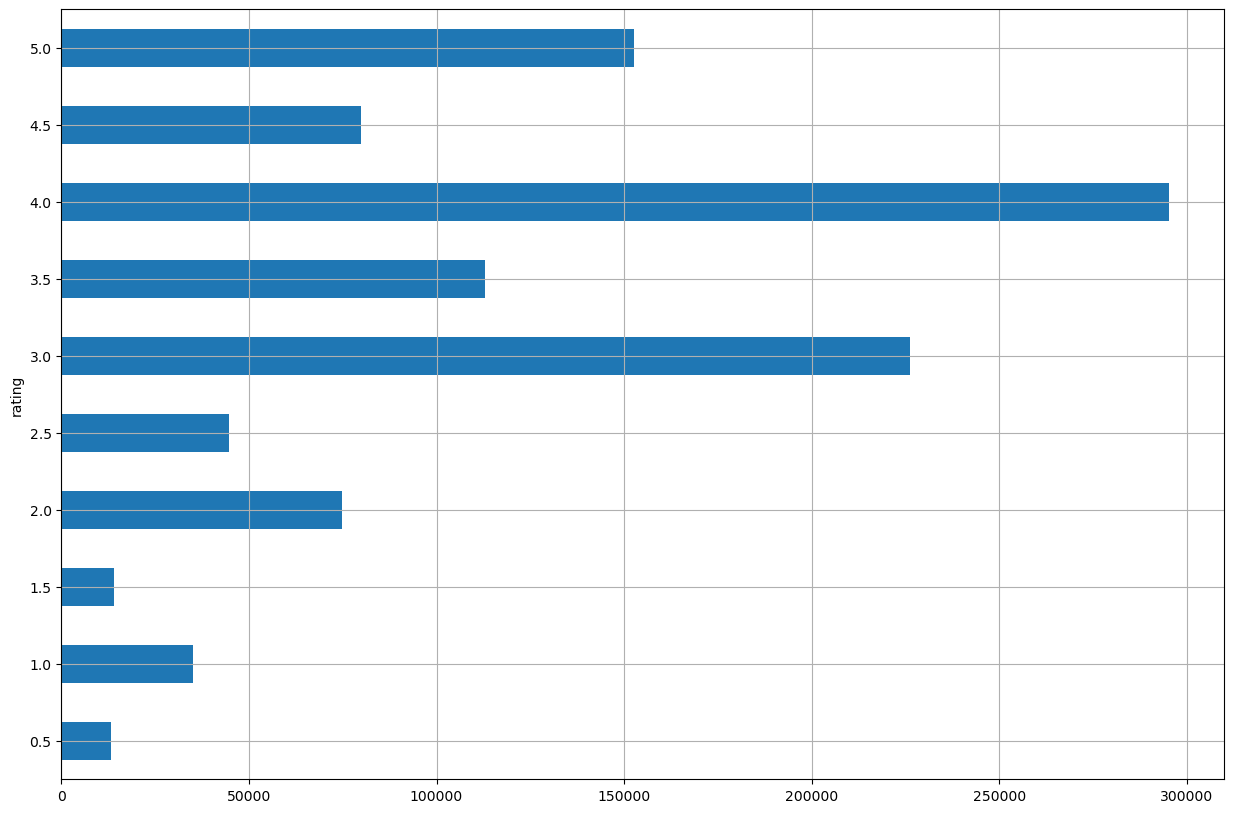

In [12]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.grid(True)

In [13]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## Preprocessing the data

In [14]:
# make a list of genres of movies
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [15]:
# specify genres of movies in netflix_dataset to determine choices of users
for i in range(len(movies)):
    for j in movies.iloc[i]['genres']:
        netflix_dataset.loc[netflix_dataset['movieId'] == movies.iloc[i]['movieId'], j] =1
            

In [16]:
netflix_dataset.head()

,userId,movieId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,2,3.5,1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,29,3.5,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,32,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,47,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,50,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# filling the null values with 0
netflix_dataset.fillna(0 , inplace=True)
netflix_dataset.head()

,userId,movieId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,2,3.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,29,3.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,32,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
netflix_dataset.shape

(1048575, 23)

In [19]:
netflix_dataset.sum()[3:]

Adventure             230358.0
Animation              59117.0
Children               87101.0
Comedy                395994.0
Fantasy               110815.0
Romance               201209.0
Drama                 461704.0
Action                293934.0
Crime                 171866.0
Thriller              278937.0
Horror                 77518.0
Mystery                82157.0
Sci-Fi                166024.0
IMAX                   25527.0
Documentary            12675.0
War                    54347.0
Musical                45788.0
Western                22488.0
Film-Noir              11241.0
(no genres listed)         7.0
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Animation'),
  Text(2, 0, 'Children'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'IMAX'),
  Text(14, 0, 'Documentary'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Musical'),
  Text(17, 0, 'Western'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

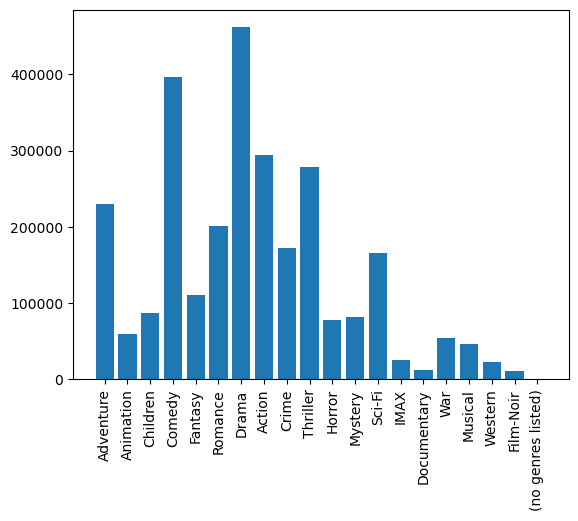

In [20]:
plt.bar(netflix_dataset.sum()[3:].index, netflix_dataset.sum()[3:].values)
plt.xticks(rotation = 90)

### most watched and liked genre is drama

In [21]:
# remove the rows whose genre is not known
netflix_dataset = netflix_dataset[netflix_dataset['(no genres listed)'] !=1]

In [22]:
mean_rating = []
genre_list = netflix_dataset.columns[3:]
genre_list

Index(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir',
       '(no genres listed)'],
      dtype='object')

In [23]:
for i in genre_list:
    num = netflix_dataset[netflix_dataset[i] == 1].rating.mean()
    mean_rating.append(num)
mean_rating

[3.5074145460544024,
 3.608344469441954,
 3.4041400213545194,
 3.4322868528311035,
 3.5093579389071876,
 3.5464840041946433,
 3.6783783549633533,
 3.450897140174325,
 3.6837012556293858,
 3.5119812000559265,
 3.262442271472432,
 3.6652567644875056,
 3.4345185033489134,
 3.656696830806597,
 3.7587376725838264,
 3.821342484405763,
 3.550362540403599,
 3.57343916755603,
 3.9561426919313227,
 nan]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Animation'),
  Text(2, 0, 'Children'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'IMAX'),
  Text(14, 0, 'Documentary'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Musical'),
  Text(17, 0, 'Western'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

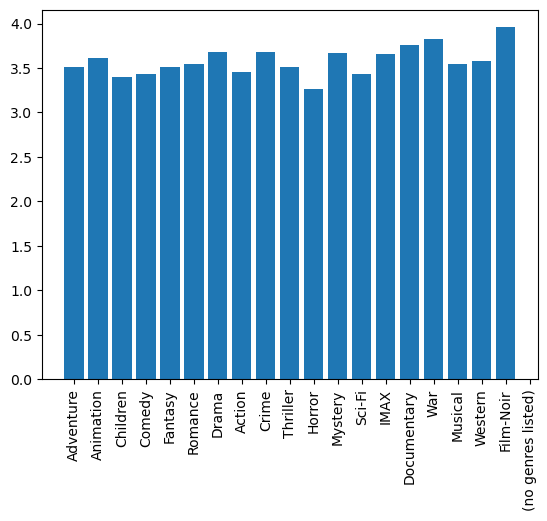

In [24]:
plt.bar(genre_list, mean_rating)
plt.xticks(rotation = 90)

### Film-Noir Movies have received the best ratings and  Horror movies received worst ratings based on User Rating

In [25]:
netflix_dataset.userId.value_counts().sort_index()

1       175
2        61
3       187
4        28
5        66
       ... 
7116    232
7117    188
7118     40
7119     50
7120     20
Name: userId, Length: 7120, dtype: int64

In [26]:
#now we will remove all the users that have rated less movies
dataset_cust_summary=netflix_dataset.groupby('userId')['rating'].agg(['count'])
dataset_cust_summary

,count
userId,
1,175
2,61
3,187
4,28
5,66
...,...
7116,232
7117,188
7118,40


In [27]:
# create a benchmark
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

95.0

In [28]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([   2,    4,    5,    6,    8,    9,   10,   12,   13,   15,
            ...
            7106, 7108, 7109, 7111, 7112, 7113, 7114, 7118, 7119, 7120],
           dtype='int64', name='userId', length=4266)

In [29]:
# remove all those movies that has been rated less in numbers
dataset_movie_summary = netflix_dataset.groupby('movieId')['rating'].agg(['count','mean'])
dataset_movie_summary

,count,mean
movieId,,
1,2569,3.959323
2,1155,3.268398
3,685,3.186861
4,138,3.000000
5,657,3.143836
...,...,...
130052,1,1.000000
130073,1,2.500000
130219,1,4.500000


In [30]:
mov_benchmark = dataset_movie_summary["count"].quantile(0.65)
print(mov_benchmark)

22.0


In [31]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count']<mov_benchmark].index
drop_movie_list

Int64Index([    33,     37,     49,     51,     53,     56,     59,     67,
                77,     84,
            ...
            129303, 129350, 129354, 129428, 129707, 130052, 130073, 130219,
            130490, 130642],
           dtype='int64', name='movieId', length=9069)

In [32]:
# remove all the customers and movies that are below the benchmark
netflix_dataset=netflix_dataset[~netflix_dataset['movieId'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['userId'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (810104, 23)


In [33]:
netflix_dataset.head()

,userId,movieId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,2,3.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,29,3.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,32,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Recommending Movies 

In [34]:
!pip install scikit-surprise

In [35]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [36]:
# help us to read the dataset for svd algo
reader=Reader()

In [37]:
# recommend the movies whose genre is Adventure
adventure_data = netflix_dataset[netflix_dataset['Adventure'] == 1]
adventure_data.shape

(179694, 23)

In [38]:
data=Dataset.load_from_df(adventure_data[['userId', 'movieId','rating']], reader)

In [39]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8133  0.8178  0.8109  0.8172  0.8137  0.8146  0.0026  
MAE (testset)     0.6239  0.6288  0.6218  0.6262  0.6245  0.6251  0.0024  
Fit time          3.59    3.71    3.42    3.34    3.64    3.54    0.14    
Test time         0.51    0.65    0.51    0.63    0.57    0.57    0.06    


{'test_rmse': array([0.81334365, 0.81779336, 0.81094639, 0.81717893, 0.81372458]),
 'test_mae': array([0.62389634, 0.62883467, 0.62180971, 0.62619574, 0.62452006]),
 'fit_time': (3.5911154747009277,
  3.7078747749328613,
  3.4155592918395996,
  3.338387966156006,
  3.6385042667388916),
 'test_time': (0.5059139728546143,
  0.6478104591369629,
  0.5050122737884521,
  0.6255133152008057,
  0.569861888885498)}

In [40]:
# we take user 5546 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_5546 = adventure_data[(adventure_data['userId'] ==5546)& (adventure_data['rating']==5)]

In [41]:
dataset_5546.head() 

,userId,movieId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
833570,5546,2,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833582,5546,150,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
833587,5546,231,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833589,5546,260,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833591,5546,316,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_5546 = movies.copy()
user_5546

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),[Comedy]
27274,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy]
27275,131258,The Pirates (2014),[Adventure]
27276,131260,Rentun Ruusu (2001),[(no genres listed)]


In [43]:
watched_movies = netflix_dataset[(netflix_dataset['userId'] == 5546)& (netflix_dataset['Adventure'] == 1)]['movieId']

In [44]:
user_5546 = user_5546[~user_5546['movieId'].isin(drop_movie_list)]
user_5546 = user_5546[~user_5546['movieId'].isin(watched_movies)]
user_5546

,movieId,title,genres
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
5,6,Heat (1995),"[Action, Crime, Thriller]"
6,7,Sabrina (1995),"[Comedy, Romance]"
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),[Comedy]
27274,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy]
27275,131258,The Pirates (2014),[Adventure]
27276,131260,Rentun Ruusu (2001),[(no genres listed)]


In [45]:
user_5546['Estimate_Score']=user_5546['movieId'].apply(lambda x: svd.predict(5546, x).est)
user_5546=user_5546.drop(['movieId','genres'], axis=1)

In [46]:
user_5546=user_5546.sort_values('Estimate_Score', ascending=False)
print(user_5546)

                                                   title  Estimate_Score
6975                          Passage to India, A (1984)        5.000000
5917                 City of God (Cidade de Deus) (2002)        5.000000
10394  Family Guy Presents Stewie Griffin: The Untold...        5.000000
7924                             Tokyo Godfathers (2003)        5.000000
8953                         Bourne Identity, The (1988)        5.000000
...                                                  ...             ...
1452                 Turbo: A Power Rangers Movie (1997)        2.664644
8147     Anacondas: The Hunt for the Blood Orchid (2004)        2.570020
5573   Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (...        2.499026
2180                          Nothing But Trouble (1991)        2.491575
9758                              Son of the Mask (2005)        2.365405

[18039 rows x 2 columns]


In [47]:
print('Adventure movies recommended for userId 5546 are :')
user_5546.head().title

Adventure movies recommended for userId 5546 are :


6975                            Passage to India, A (1984)
5917                   City of God (Cidade de Deus) (2002)
10394    Family Guy Presents Stewie Griffin: The Untold...
7924                               Tokyo Godfathers (2003)
8953                           Bourne Identity, The (1988)
Name: title, dtype: object

### similarly movies of different genres can be recommended to all users